<h1><center>SDS Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates
%matplotlib inline

<h3>Data Loading

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


<h3>Data Cleaning

In [4]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

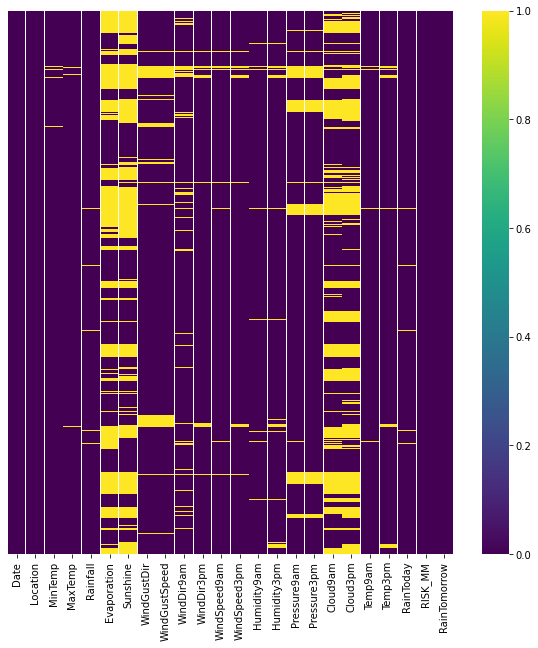

In [5]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

Dropping columns with more than 40% of null values.

In [6]:
#function to return the columns with more than a certain percentage null values 
def columns_to_be_dropped(data,percentage):
    columns_null = []
    for column in data.columns:
        if (data[column].isnull().sum() / len(data[column])) * 100 >= percentage:
            columns_null.append(column)
    return columns_null

In [7]:
columns = columns_to_be_dropped(data,40)
print(columns)
data.drop(columns,axis = 1,inplace = True)

['Evaporation', 'Sunshine', 'Cloud3pm']


Inputing the numerical values to mean and the categorical columns to forward fill.

In [8]:
def stats(column,method=None):
    if data[column].dtype == 'object' and not method:
        data[column].fillna(method='ffill',inplace=True) # forward fill for categorical columns
        return
    if method == 'mode':
        mode = data[column].value_counts().index[0]
        data[column].fillna(mode,inplace=True)
    elif method == 'median':
        data[column].fillna(data[column].median(),inplace=True) 
    else:
        data[column].fillna(data[column].mean(),inplace=True) # default to mean

In [9]:
for i in data.columns:
    if data[i].isnull().values.sum(): # imputing columns with null values 
        stats(i)
        print('Removed null values from column',i)

Removed null values from column MinTemp
Removed null values from column MaxTemp
Removed null values from column Rainfall
Removed null values from column WindGustDir
Removed null values from column WindGustSpeed
Removed null values from column WindDir9am
Removed null values from column WindDir3pm
Removed null values from column WindSpeed9am
Removed null values from column WindSpeed3pm
Removed null values from column Humidity9am
Removed null values from column Humidity3pm
Removed null values from column Pressure9am
Removed null values from column Pressure3pm
Removed null values from column Cloud9am
Removed null values from column Temp9am
Removed null values from column Temp3pm
Removed null values from column RainToday


In [10]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

<h3>Exploratory Data Analysis

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   WindGustDir    142193 non-null  object 
 6   WindGustSpeed  142193 non-null  float64
 7   WindDir9am     142193 non-null  object 
 8   WindDir3pm     142193 non-null  object 
 9   WindSpeed9am   142193 non-null  float64
 10  WindSpeed3pm   142193 non-null  float64
 11  Humidity9am    142193 non-null  float64
 12  Humidity3pm    142193 non-null  float64
 13  Pressure9am    142193 non-null  float64
 14  Pressure3pm    142193 non-null  float64
 15  Cloud9am       142193 non-null  float64
 16  Temp9am        142193 non-null  float64
 17  Temp3pm        142193 non-nul

In [12]:
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RISK_MM
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,16.987509,21.687235,2.360682
std,6.388924,7.109554,8.423217,13.138385,8.851082,8.721551,18.932077,20.532065,6.746248,6.681788,2.278080,6.472166,6.870771,8.477969
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,12.300000,16.700000,0.000000
50%,12.000000,22.700000,0.000000,39.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,1015.258204,4.437189,16.800000,21.300000,0.000000
75%,16.800000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,21.500000,26.300000,0.800000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,40.200000,46.700000,371.000000


In [13]:
#Lets first separate the numerical and categorical columns
def num_cat(data):
    cat = []
    num = []
    for i in data.columns:
        if data[i].dtype == 'object':
            cat.append(i)
        else:
            num.append(i)
    return num,cat
numerical_columns, categorical_columns = num_cat(data)

In [14]:
numerical_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

In [15]:
categorical_columns

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


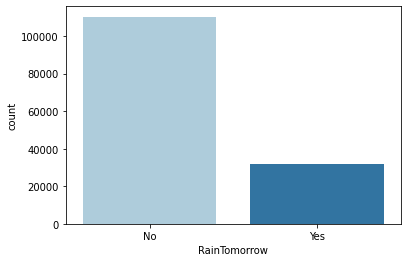

In [16]:
sns.countplot('RainTomorrow',data=data,palette='Paired')

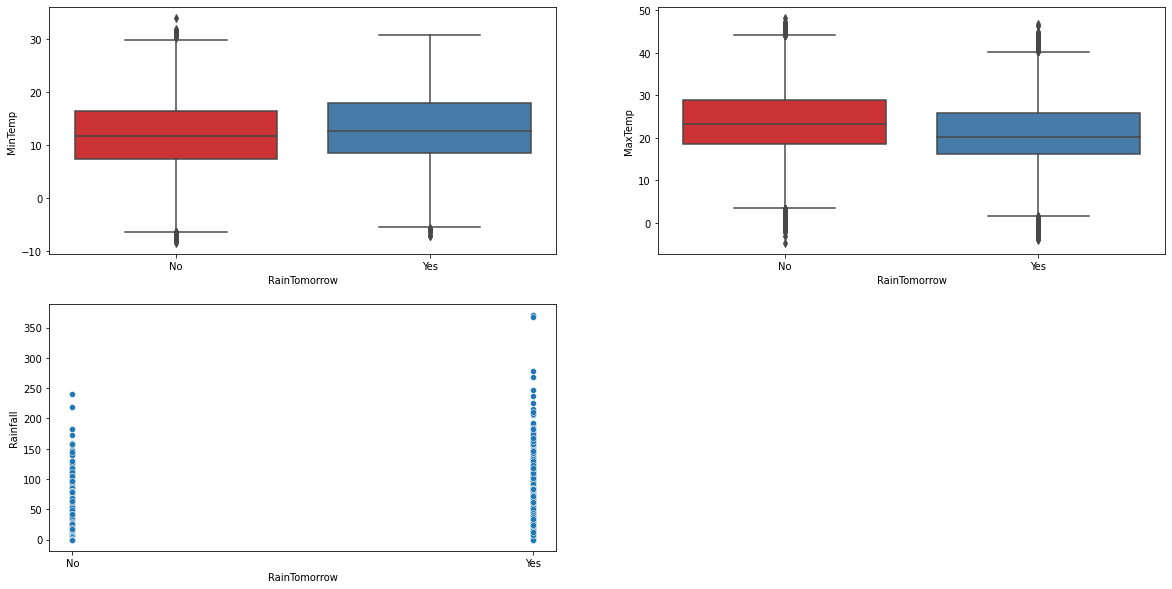

In [17]:
#using subplots to plot multiple plots at once
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,2,1)
sns.boxplot(x='RainTomorrow',y='MinTemp',data=data,palette='Set1')
fig.add_subplot(2,2,2)
sns.boxplot(x='RainTomorrow',y='MaxTemp',data=data,palette='Set1')
fig.add_subplot(2,2,3)
sns.scatterplot(x='RainTomorrow',y='Rainfall',data=data,palette='Set1')

The above plots show that RainTomorrow depends slightly on the MinTemp and MaxTemp values of the current day. Also the if the rainfall on the current day was heavy the data shows a greater probability of Rain the next day.

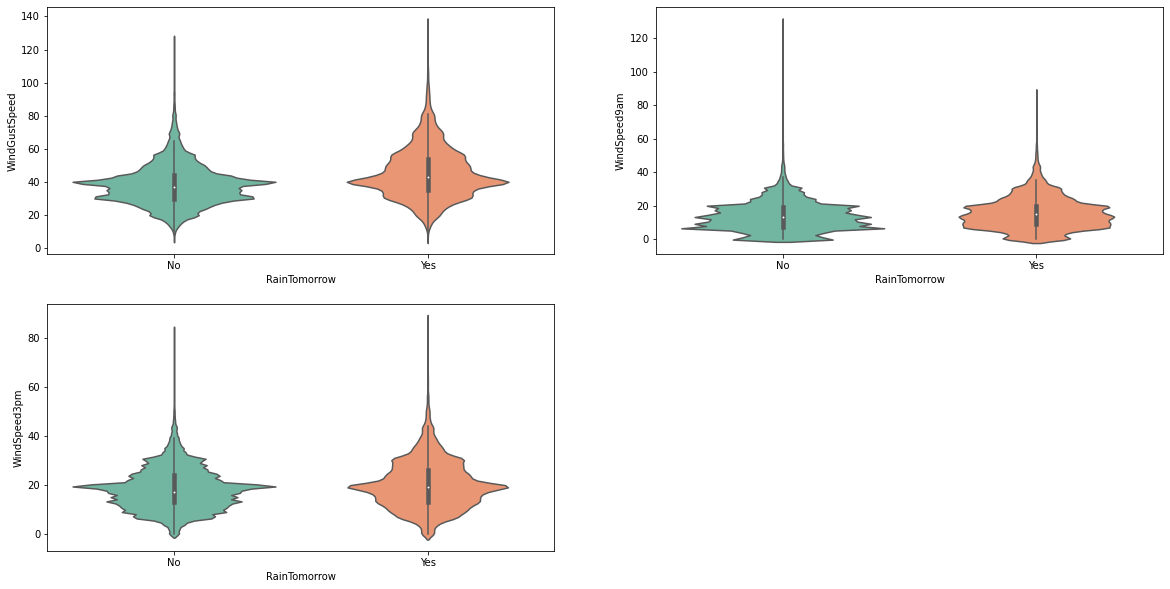

In [18]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,2,1)
sns.violinplot(x='RainTomorrow',y='WindGustSpeed',data=data,palette='Set2')
fig.add_subplot(2,2,2)
sns.violinplot(x='RainTomorrow',y='WindSpeed9am',data=data,palette='Set2')
fig.add_subplot(2,2,3)
sns.violinplot(x='RainTomorrow',y='WindSpeed3pm',data=data,palette='Set2')

The above plots show that RainTomorrow has slight variation with respect to the WindGustSpeed and WindSpeed3pm fields. A higher wind gust speed has a higher chance of affecting the rain the next day similar to the wind speed at 3pm. The wind speed of 9 am shows similar readings when there was or wasnt any rain, the next day.

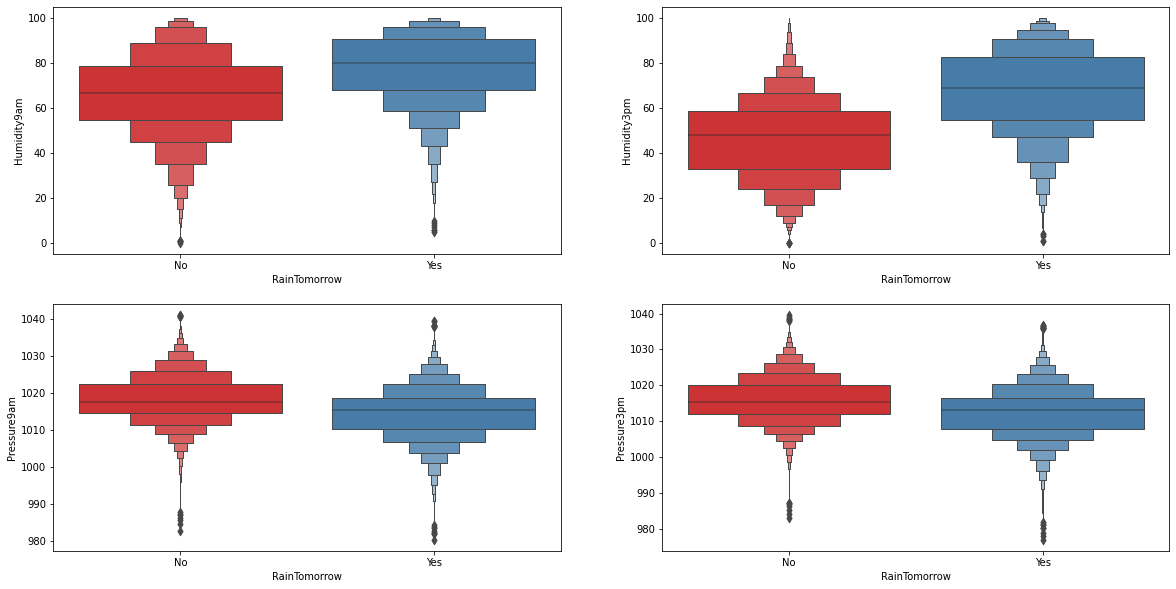

In [19]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,2,1)
sns.boxenplot(x='RainTomorrow',y='Humidity9am',data=data,palette='Set1')
fig.add_subplot(2,2,2)
sns.boxenplot(x='RainTomorrow',y='Humidity3pm',data=data,palette='Set1')
fig.add_subplot(2,2,3)
sns.boxenplot(x='RainTomorrow',y='Pressure9am',data=data,palette='Set1')
fig.add_subplot(2,2,4)
sns.boxenplot(x='RainTomorrow',y='Pressure3pm',data=data,palette='Set1')

The above plots show how humidity at 9am and 3pm have a stong effect on the rain the next day. Higher the humidity, greater the chance of rain the next day, as one would expect. Similarly the pressure factor also contributes a good ammount in determining the rain tomorrow factor, lower the pressure higher the probability of rain happening the next day.

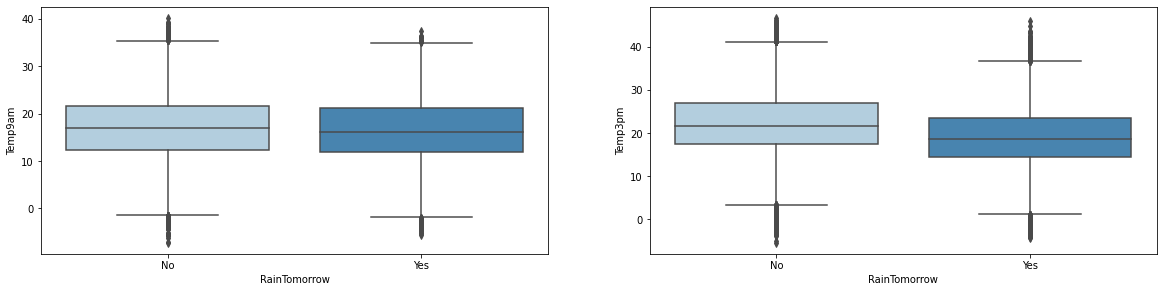

In [20]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,2,1)
sns.boxplot(x='RainTomorrow',y='Temp9am',data=data,palette='Blues')
fig.add_subplot(2,2,2)
sns.boxplot(x='RainTomorrow',y='Temp3pm',data=data,palette='Blues')

The plots show that rain tomorrow hardly depends on the temperature of the day at 9am but the temperature at 3pm does moderately affect the rain, lower temperatures results in higher chance of rain.

In [21]:
def cat_classes(data,columns):
    for i in columns:
        print(i,'Classes -',data[i].unique(),'\n') 
cat_classes(data,categorical_columns[1:])

Location Classes - ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] 

WindGustDir Classes - ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW'] 

WindDir9am Classes - ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE'] 

WindDir3pm Classes - ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE'] 

RainToday Classes - ['No' 'Yes'] 

RainTomorrow Classes - ['No' 'Ye

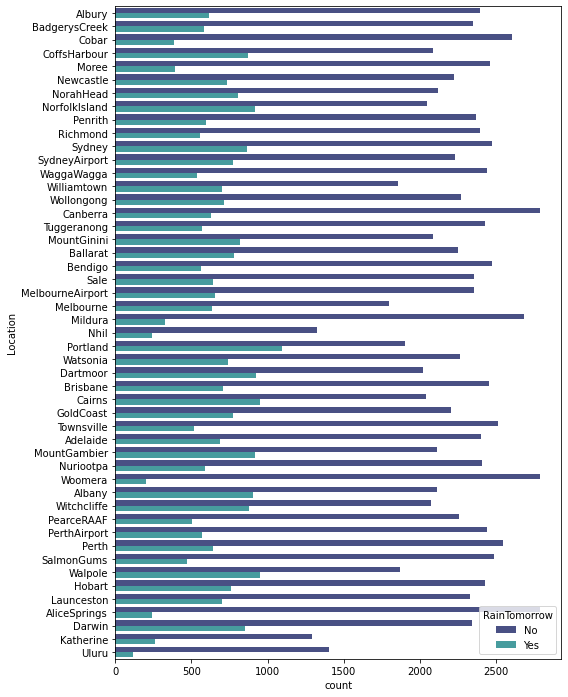

In [22]:
#plot showing rain in different locations
plt.figure(figsize=(8,12))
sns.countplot(y='Location',hue='RainTomorrow',data=data,palette='mako')

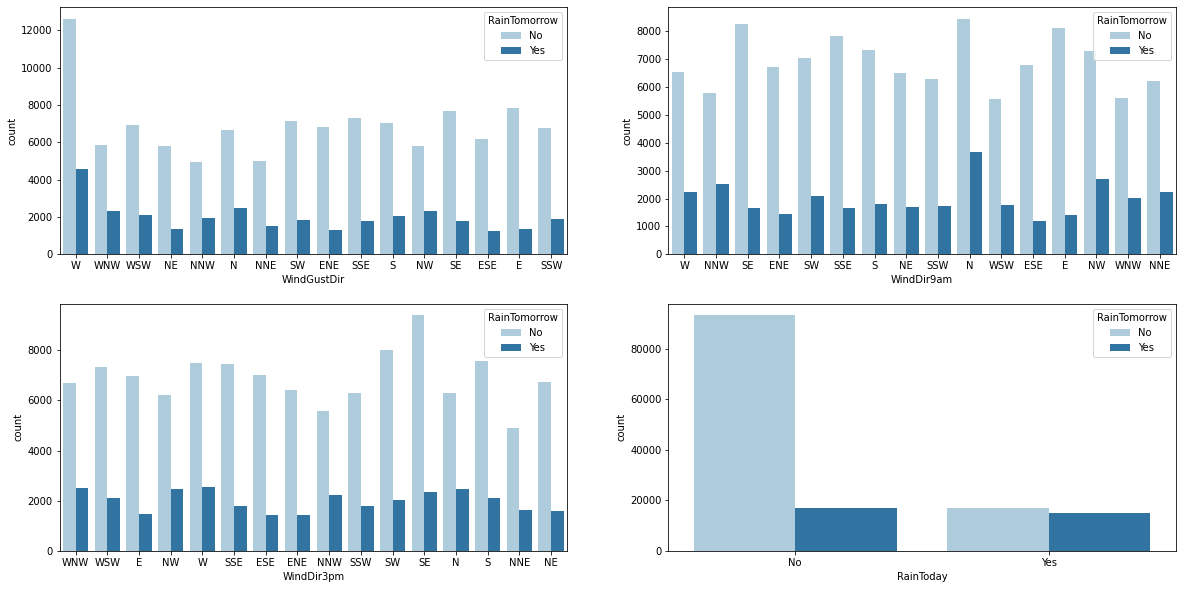

In [23]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,2,1)
sns.countplot(x='WindGustDir',hue = 'RainTomorrow',data=data,palette='Paired')
fig.add_subplot(2,2,2)
sns.countplot(x='WindDir9am',hue = 'RainTomorrow',data=data,palette='Paired')
fig.add_subplot(2,2,3)
sns.countplot(x='WindDir3pm', hue = 'RainTomorrow',data=data,palette='Paired')
fig.add_subplot(2,2,4)
sns.countplot(x='RainToday',hue = 'RainTomorrow',data=data,palette='Paired')

The plots show how wind directions affect the next day's rain. It also shows that the chances of rain occuring the next day is higher if it rained on that particular day.

<h3>Hypothesis Testing

Hypothesis: The humidtiy at 3pm of the current day, when the rain tomorrow is yes, has an mean value greater than 60.<br>
H0 (null hypothesis) : X' <= 68.1<br>
H1 (alternate hypothesis): X' > 68.1

In [69]:
#finding the mean and standard deviation of the humidity3pm when raintomorrow is Yes
mean = data[data['RainTomorrow']=='Yes']['Humidity3pm'].mean()
std = data[data['RainTomorrow']=='Yes']['Humidity3pm'].std()
n = len(data[data['RainTomorrow']=='Yes']['Humidity3pm'])
print('Mean =',mean,'\nStandard Deviation =',std,'\nNumber of samples (n) =',n)

Mean = 68.27631936105608 
Standard Deviation = 18.98045350307591 
Number of samples (n) = 31877


In [70]:
print(std/np.sqrt(n))

0.10630846898936762


Now since sample size is greater than 30, By central limit theorem we can assume that X follows Normal distribution <br>
X ~ N(68.2763, 0.1063<sup>2</sup>)

In [71]:
#printing the z score
z = (mean - 68.1) / (std/np.sqrt(n))
print(z)

1.658563637801256


P(z <= 1.66) = 0.95154 <br>
P(z >= 1.66) = 1 - 0.95154 = 0.04846 <br>
P value = 0.04646 <br>
Now since the P value is less than 0.05 we should reject the null hypothesis (H0) and conclude the alternate hypothesis is true.

<h3>Handling Categorical Columns

In [ ]:
categorical_columns

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

Coverting RainToday and RainTomorrow columns to numerical columns by replacing Yes with 1 and No with 0.

In [ ]:
data['RainToday'] = data['RainToday'].map({'Yes':1,'No':0})
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes':1,'No':0})

For the other columns the encoding is done depending on how they affect the data. (Necessary for models that depend on distance)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
#example
data.groupby('WindGustDir')['RainTomorrow'].sum().sort_values()

WindGustDir
ESE     629
NNW     634
E       701
SE      710
SW      726
ENE     739
NE      748
WSW     791
NW      803
NNE     818
WNW     830
N       841
SSE     862
SSW    1039
S      1293
W      2069
Name: RainTomorrow, dtype: int64

So now we need to encode ESE to 0, ENE to 1, NE to 2 and so on.. Which is done by the following function.

In [ ]:
def encode(data,columns):
    for column in columns:
        ordered_column = data.groupby(column)['RainTomorrow'].sum().sort_values()
        encoder.fit(data[column])
        encoder.classes_ = ordered_column.index
        data[column] = encoder.transform(data[column])

In [ ]:
encode(data,['Location','WindGustDir','WindDir9am','WindDir3pm'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63535 entries, 0 to 63534
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           63535 non-null  object 
 1   Location       63535 non-null  int64  
 2   MinTemp        63535 non-null  float64
 3   MaxTemp        63535 non-null  float64
 4   Rainfall       63535 non-null  float64
 5   WindGustDir    63535 non-null  int64  
 6   WindGustSpeed  63535 non-null  float64
 7   WindDir9am     63535 non-null  int64  
 8   WindDir3pm     63535 non-null  int64  
 9   WindSpeed9am   63535 non-null  float64
 10  WindSpeed3pm   63535 non-null  float64
 11  Humidity9am    63535 non-null  float64
 12  Humidity3pm    63535 non-null  float64
 13  Pressure9am    63535 non-null  float64
 14  Pressure3pm    63535 non-null  float64
 15  Temp9am        63535 non-null  float64
 16  Temp3pm        63535 non-null  float64
 17  RainToday      63535 non-null  int64  
 18  RISK_M

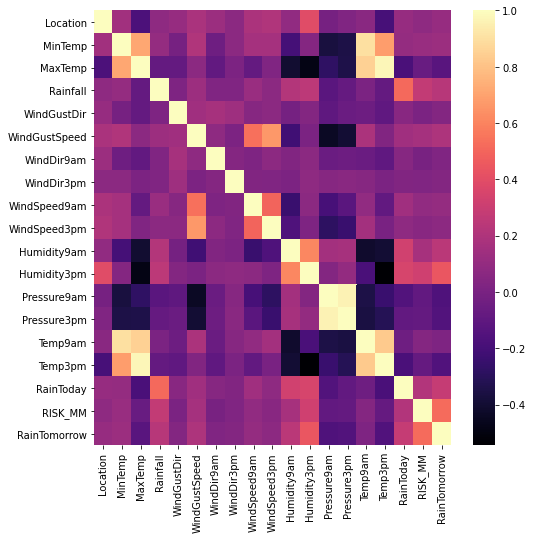

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),cmap='magma')

<h3>Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = data.loc[:,'Location':'RainToday']
Y = data['RainTomorrow']

In [ ]:
X = scaler.fit_transform(X)

<h3>Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

<h3>Machine Learning Models

In [ ]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#function to use grid seach to find the best parameters of a model
def get_best_para(model,parameters,x,y):
    grid_search = GridSearchCV(estimator=model,param_grid=parameters,cv=5,n_jobs=-1)
    grid_search.fit(x,y)
    return grid_search.best_params_

In [ ]:
#function to check the performance of a model on the train data
def performance(y,y_predict):
    print('Precision =',precision_score(y,y_predict))
    print('Recall of =',recall_score(y,y_predict))
    print('F1 Score =',f1_score(y,y_predict))
    print('Confusion Matrix :-\n',confusion_matrix(y,y_predict))
    sns.heatmap(confusion_matrix(y,y_predict),cmap='Blues')

<h4>Stochastic Gradient Desent Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42,loss='log')
sgd_clf.fit(X_train,Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Performance of Stochastic Gradient Desent Classifier on train data
Precision = 0.7314756174794174
Recall of = 0.407012598008986
F1 Score = 0.5230089998301919
Confusion Matrix :-
 [[37781  1696]
 [ 6731  4620]]


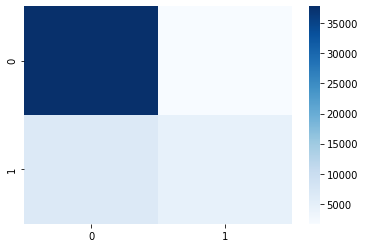

In [ ]:
#testing the model on the train data
y_train_predict = sgd_clf.predict(X_train)
print('Performance of Stochastic Gradient Desent Classifier on train data')
performance(Y_train,y_train_predict)

Performance of Stochastic Gradient Desent Classifier on test data
Precision = 0.729375
Recall of = 0.40492713393476754
F1 Score = 0.5207496653279785
Confusion Matrix :-
 [[9392  433]
 [1715 1167]]


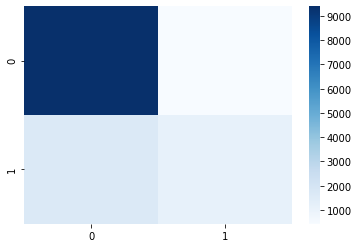

In [ ]:
#testing the model on the test data
y_test_predict = sgd_clf.predict(X_test)
print('Performance of Stochastic Gradient Desent Classifier on test data')
performance(Y_test,y_test_predict)

<h4>Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC(gamma='auto')
svc_clf.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Performance of Support Vector Machine Classifier on train data
Precision = 0.8140170390612441
Recall of = 0.4461280944410184
F1 Score = 0.5763715001138174
Confusion Matrix :-
 [[38320  1157]
 [ 6287  5064]]


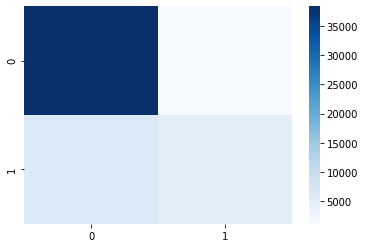

In [ ]:
#testing the model on the train data
y_train_predict = svc_clf.predict(X_train)
print('Performance of Support Vector Machine Classifier on train data')
performance(Y_train,y_train_predict)

Performance of Support Vector Machine Classifier on test data
Precision = 0.7802690582959642
Recall of = 0.4226231783483692
F1 Score = 0.548278190411884
Confusion Matrix :-
 [[9482  343]
 [1664 1218]]


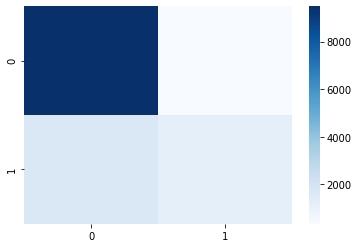

In [ ]:
#testing the model on the test data
y_test_predict = svc_clf.predict(X_test)
print('Performance of Support Vector Machine Classifier on test data')
performance(Y_test,y_test_predict)

<h4>Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Performance of Logistic Regression on train data
Precision = 0.7106962380685008
Recall of = 0.4460399964760814
F1 Score = 0.5480920162381596
Confusion Matrix :-
 [[37416  2061]
 [ 6288  5063]]


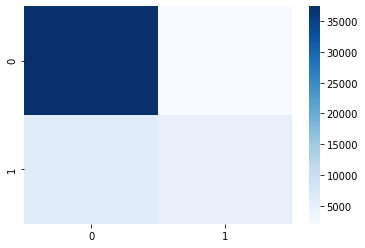

In [ ]:
#testing the model on the train data
y_train_predict = log_reg.predict(X_train)
print('Performance of Logistic Regression on train data')
performance(Y_train,y_train_predict)

Performance of Logistic Regression on test data
Precision = 0.7073304157549234
Recall of = 0.448646773074254
F1 Score = 0.5490445859872611
Confusion Matrix :-
 [[9290  535]
 [1589 1293]]


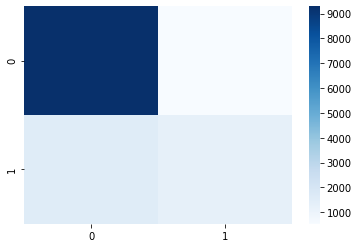

In [ ]:
#testing the model on the test data
y_test_predict = log_reg.predict(X_test)
print('Performance of Logistic Regression on test data')
performance(Y_test,y_test_predict)

<h4>K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
parameter = [{'n_neighbors':[10,15,20,25,30]}] 
get_best_para(KNeighborsClassifier(),parameter,X_train,Y_train)

{'n_neighbors': 25}

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=25)
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

Performance of K Neighbors Classifier on train data
Precision = 0.7895370848390982
Recall of = 0.4041934631310017
F1 Score = 0.5346696189255331
Confusion Matrix :-
 [[38254  1223]
 [ 6763  4588]]


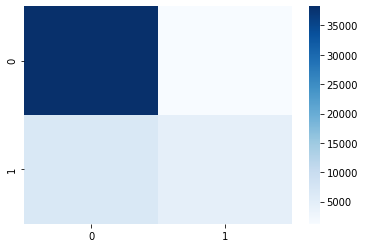

In [ ]:
#testing the model on the train data
y_train_predict = knn_clf.predict(X_train)
print('Performance of K Neighbors Classifier on train data')
performance(Y_train,y_train_predict)

Performance of K Neighbors Classifier on test data
Precision = 0.7616758241758241
Recall of = 0.3848022206800833
F1 Score = 0.5112955278930382
Confusion Matrix :-
 [[9478  347]
 [1773 1109]]


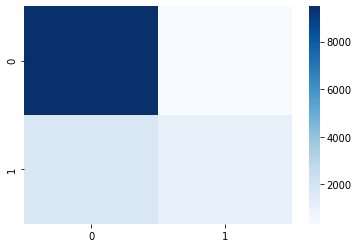

In [ ]:
#testing the model on the test data
y_test_predict = knn_clf.predict(X_test)
print('Performance of K Neighbors Classifier on test data')
performance(Y_test,y_test_predict)

<h4>Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameter = [{'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_leaf':[1,5,10]}]
get_best_para(DecisionTreeClassifier(),parameter,X_train,Y_train)

{'max_depth': 7, 'min_samples_leaf': 10}

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=7,min_samples_leaf=10)
dt_clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Performance of Decision Tree Classifier on train data
Precision = 0.761387011460476
Recall of = 0.4565236543035856
F1 Score = 0.5707991408272292
Confusion Matrix :-
 [[37853  1624]
 [ 6169  5182]]


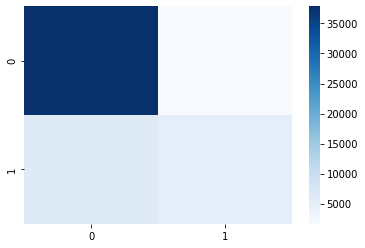

In [ ]:
#testing the model on the train data
y_train_predict = dt_clf.predict(X_train)
print('Performance of Decision Tree Classifier on train data')
performance(Y_train,y_train_predict)

Performance of Decision Tree Classifier on test data
Precision = 0.712463768115942
Recall of = 0.42643997224149893
F1 Score = 0.5335359235945301
Confusion Matrix :-
 [[9329  496]
 [1653 1229]]


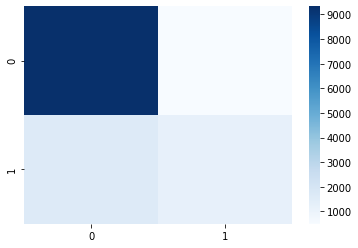

In [ ]:
#testing the model on the test data
y_test_predict = dt_clf.predict(X_test)
print('Performance of Decision Tree Classifier on test data')
performance(Y_test,y_test_predict)

<h4>Random Tree Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
parameter = {'max_depth':[10,100,200],'min_samples_leaf':[1,5,10]}
get_best_para(RandomForestClassifier(n_estimators=50,n_jobs=-1),parameter,X_train,Y_train)

{'max_depth': 200, 'min_samples_leaf': 5}

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1,max_depth=200,min_samples_leaf=5)
rnd_clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=200, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Performance of Random Forest Classifier on train data
Precision = 0.9412128712871287
Recall of = 0.6699850233459607
F1 Score = 0.7827698008337193
Confusion Matrix :-
 [[39002   475]
 [ 3746  7605]]


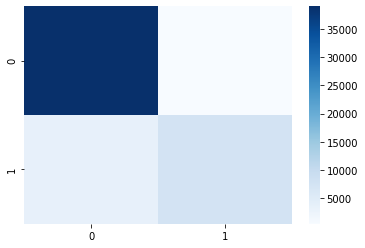

In [ ]:
#testing the model on the train data
y_train_predict = rnd_clf.predict(X_train)
print('Performance of Random Forest Classifier on train data')
performance(Y_train,y_train_predict)

Performance of Random Forest Classifier on test data
Precision = 0.772196261682243
Recall of = 0.4587092297015961
F1 Score = 0.5755333043099695
Confusion Matrix :-
 [[9435  390]
 [1560 1322]]


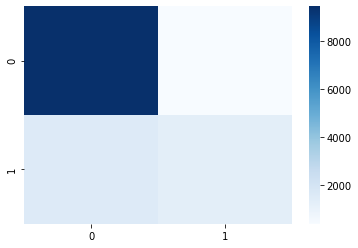

In [ ]:
#testing the model on the test data
y_test_predict = rnd_clf.predict(X_test)
print('Performance of Random Forest Classifier on test data')
performance(Y_test,y_test_predict)

<h4>Final Model - Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('sgd',sgd_clf),('svm',svc_clf),('knn',knn_clf),('dt',dt_clf),('rnd',rnd_clf),('log',log_reg)])
voting_clf.fit(X_train,Y_train)

VotingClassifier(estimators=[('sgd',
                              SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=1000, n_iter_no_change=5,
                                            n_jobs=None, penalty='l2',
                                            power_t=0.5, random_state=42,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            wa...
                                                     random_state=None,
                                       

Performance of Voting Classifier on train data
Precision = 0.8468733760609735
Recall of = 0.4307109505770417
F1 Score = 0.5710114459238496
Confusion Matrix :-
 [[38593   884]
 [ 6462  4889]]


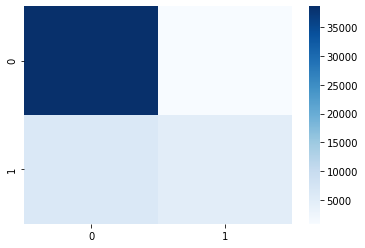

In [ ]:
#testing the model on the train data
y_train_predict = voting_clf.predict(X_train)
print('Performance of Voting Classifier on train data')
performance(Y_train,y_train_predict)

Performance of Voting Classifier on test data
Precision = 0.7863013698630137
Recall of = 0.3983344899375434
F1 Score = 0.5287885766927684
Confusion Matrix :-
 [[9513  312]
 [1734 1148]]


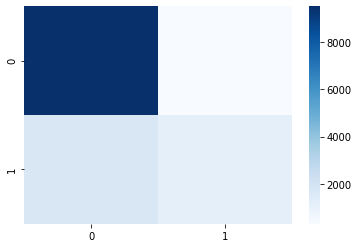

In [ ]:
#testing the model on the test data
y_test_predict = voting_clf.predict(X_test)
print('Performance of Voting Classifier on test data')
performance(Y_test,y_test_predict)